# Machine Learning I (CC2008) - 2022/2023

## Exercise Sheet 1


Load the following packages

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.getcwd()
#os.chdir()

### Exploring Data 

Read the 'HotelReservations.csv' file to a data frame. 
Explore the data set.

In [ ]:
df = pd.read_csv('HotelReservations.csv')

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.info

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.describe(include='all')

In [ ]:
df.head(10)

In [ ]:
df.Booking_ID.nunique()

In [ ]:
df.required_car_parking_space.value_counts()

In [ ]:
df.loc[1:10,]

In [ ]:
df.lead_time.mean()

In [ ]:
df.loc[df.avg_price_per_room.argmax(),]

In [ ]:
df.nlargest(n=10,columns='avg_price_per_room')

In [ ]:
df[['room_type_reserved', 'required_car_parking_space']]

In [ ]:
df[df.no_of_previous_cancellations > 0]

In [37]:
df[(df.no_of_previous_cancellations > 0) & (df.no_of_children > 0)].loc[:, 'type_of_meal_plan':'market_segment_type']

,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type
34467,Meal Plan 1,0,Room_Type 1,2,2018,3,31,Corporate


In [38]:
df['has_special_requests'] = df['no_of_special_requests'].apply(lambda x: True if x > 0 else False)

In [39]:
df[['has_special_requests', 'no_of_special_requests']]

,has_special_requests,no_of_special_requests
0,False,0
1,True,1
2,False,0
3,False,0
4,False,0
...,...,...
36270,True,1
36271,True,2
36272,True,2
36273,False,0


In [41]:
df.sort_values(['arrival_year'])[['arrival_year', 'arrival_month']]

,arrival_year,arrival_month
0,2017,10
9958,2017,11
28069,2017,11
28065,2017,8
28064,2017,8
...,...,...
13256,2018,4
13255,2018,11
13254,2018,4
13270,2018,4


In [42]:
df.sort_values(['arrival_year', 'arrival_month'])[['arrival_year', 'arrival_month']]

,arrival_year,arrival_month
153,2017,7
201,2017,7
331,2017,7
332,2017,7
560,2017,7
...,...,...
36143,2018,12
36175,2018,12
36184,2018,12
36196,2018,12


In [43]:
pd.crosstab(df.arrival_year,df.arrival_month)

arrival_month,1,2,3,4,5,6,7,8,9,10,11,12
arrival_year,,,,,,,,,,,,
2017,0,0,0,0,0,0,363,1014,1649,1913,647,928
2018,1014,1704,2358,2736,2598,3203,2557,2799,2962,3404,2333,2093


<AxesSubplot:xlabel='booking_status', ylabel='count'>

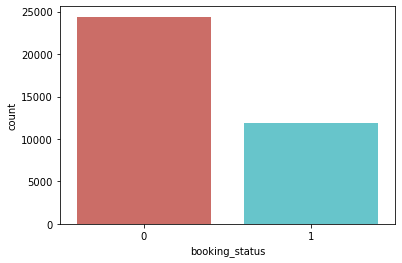

In [47]:
sns.countplot(x='booking_status', data = df, palette = 'hls')

<AxesSubplot:xlabel='booking_status', ylabel='count'>

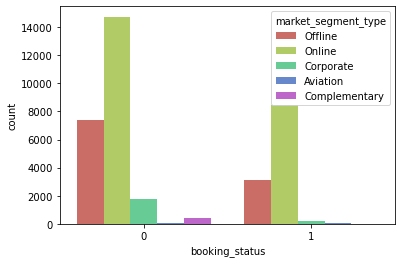

In [51]:
sns.countplot(x='booking_status', hue='market_segment_type', data = df, palette = 'hls')

In [48]:
df.groupby('booking_status').mean()

/tmp/ipykernel_7131/1101273011.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('booking_status').mean()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,has_special_requests
booking_status,,,,,,,,,,,,,,,
0,1.813489,0.095982,0.773309,2.112710,0.041410,58.927224,2017.772325,7.447724,15.532144,0.037474,0.032021,0.227101,99.931412,0.758549,0.539483
1,1.909550,0.124358,0.887505,2.392259,0.009592,139.215482,2017.919142,7.374253,15.730080,0.001346,0.005553,0.002188,110.589966,0.334623,0.281027


In [ ]:
sns.boxplot(x='booking_status',y='lead_time',data=df)

### Build and Evaluate a Machine Learning Model

Your task is to use the Hotel Reservations data set to build a decision tree to predict whether a reservation will be cancelled.

In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [63]:
df.drop(columns='Booking_ID',inplace=True)
df.booking_status= df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})
df.booking_status.unique()

KeyError: "['Booking_ID'] not found in axis"

In [64]:
df1=df.select_dtypes(include=np.number)
df1.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [65]:
X = df1.drop(['booking_status'], axis = 1)
y = df1['booking_status']
X.shape
X.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
dt = DecisionTreeClassifier(min_samples_split=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=5)

In [68]:
accuracy=dt.score(X_test,y_test)
print("Accuracy = ",accuracy)

Accuracy =  0.8581273545897271


In [69]:
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      7309
           1       0.79      0.77      0.78      3574

    accuracy                           0.86     10883
   macro avg       0.84      0.83      0.84     10883
weighted avg       0.86      0.86      0.86     10883



In [70]:
# Export decision tree to DOT format
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Not Canceled','Canceled'],
                           filled=True, rounded=True,  
                           special_characters=True)

# Plot decision tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree.pdf")  # save to file
graph.view()  # open in viewer

'decision_tree.pdf.pdf'